# IS 4487 Lab 8

## Outline

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to categories
*   Encode attributes

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_08_megatelco_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the Megatelco_leave_survey dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [26]:
import pandas as pd

# 直接从 GitHub 读取 CSV 数据
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/megatelco_leave_survey.csv"
df = pd.read_csv(url)

# 显示 DataFrame 结构
print(df.info())

# 显示前几行数据
print(df.head())

# 显示基本统计信息
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      14999 non-null  object 
 1   income                       14999 non-null  int64  
 2   data_overage_mb              14999 non-null  int64  
 3   data_leftover_mb             14999 non-null  int64  
 4   data_mb_used                 14999 non-null  int64  
 5   text_message_count           14999 non-null  int64  
 6   house                        14999 non-null  int64  
 7   handset_price                14999 non-null  int64  
 8   over_15mins_calls_per_month  14996 non-null  float64
 9   average_call_duration        14999 non-null  int64  
 10  reported_satisfaction        14999 non-null  object 
 11  reported_usage_level         14999 non-null  object 
 12  considering_change_of_plan   14999 non-null  object 
 13  leave           

## Clean up the data
Did you notice anything unusual about the "house" amounts?

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [3]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 10000)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna()

df_clean.describe()

,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,1.499000e+04,14990.000000,14990.000000,14990.000000,14990.000000
mean,242051.833689,153.593996,37.526217,4203.088192,135.629286,8.772144e+05,780.669446,10.571181,9.734556,11862.245430
std,109550.800640,112.996435,28.043476,2202.621977,48.837706,2.869092e+05,326.560845,8.401508,5.194135,6812.720757
min,52491.000000,0.000000,0.000000,400.000000,52.000000,3.200010e+05,215.000000,0.000000,1.000000,2.000000
25%,147917.250000,54.000000,12.000000,2297.250000,93.000000,6.446280e+05,498.000000,3.000000,5.000000,6139.500000
50%,241663.000000,151.000000,35.000000,4224.500000,135.000000,8.764390e+05,778.000000,9.000000,10.000000,11763.500000
75%,336483.500000,242.000000,62.000000,6080.000000,178.000000,1.098814e+06,1063.750000,17.000000,14.000000,17398.000000
max,432000.000000,380.000000,89.000000,8000.000000,220.000000,1.456389e+06,1350.000000,35.000000,19.000000,25354.000000


# Standardize attributes

- Convert the "college" variable to 0 or 1
- Convert ordinal, non-numeric attributes to ordered values on a scale of 1-3
- Convert all of these values to categories since they are not continuous numeric values


In [4]:
#Get distinct values to preview the data
df_clean['college'].unique()

array(['one', 'zero'], dtype=object)

In [5]:
df_clean['reported_satisfaction'] .unique()

array(['low', 'high', 'avg'], dtype=object)

In [6]:
df_clean['reported_usage_level'].unique()

array(['low', 'high', 'avg'], dtype=object)

In [7]:
df_clean['considering_change_of_plan'].unique()

array(['yes', 'no', 'maybe'], dtype=object)

In [8]:
#Convert to numbers to ensure the values are ordered (ordinal)
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1"
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean.head(10)

,college,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,operating_system
0,1,403137,70,0,6605,199,841317,653,5.0,8,1,1,1,LEAVE,8183,Android
1,0,129700,67,16,6028,134,476664,1193,5.0,5,1,1,1,LEAVE,12501,IOS
2,0,69741,60,0,1482,176,810225,1037,3.0,8,1,1,1,STAY,7425,IOS
3,1,377572,0,22,3005,184,826967,1161,0.0,5,1,1,0,LEAVE,13488,IOS
4,0,382080,0,0,1794,74,951896,1023,0.0,14,1,1,1,STAY,11389,IOS
5,0,309746,0,56,2675,81,1272862,1200,5.0,1,1,3,1,STAY,14674,IOS
6,1,325592,79,24,7300,190,472330,1083,5.0,6,1,2,1,LEAVE,19100,IOS
7,1,131230,0,0,4489,89,613744,365,5.0,10,1,3,1,STAY,18170,Android
8,1,193667,0,0,1023,76,949829,347,1.0,8,3,1,0,LEAVE,3201,Android
9,1,419573,0,74,4631,209,818027,640,0.0,2,1,1,1,LEAVE,12612,Android


# Convert attributes to categories

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [9]:
#Method #1
#df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      14990 non-null  category
 1   income                       14990 non-null  int64   
 2   data_overage_mb              14990 non-null  int64   
 3   data_leftover_mb             14990 non-null  int64   
 4   data_mb_used                 14990 non-null  int64   
 5   text_message_count           14990 non-null  int64   
 6   house                        14990 non-null  int64   
 7   handset_price                14990 non-null  int64   
 8   over_15mins_calls_per_month  14990 non-null  float64 
 9   average_call_duration        14990 non-null  int64   
 10  reported_satisfaction        14990 non-null  category
 11  reported_usage_level         14990 non-null  category
 12  considering_change_of_plan   14990 non-null  category
 13  leave 

## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [10]:
#Add new field with binary value for leave
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')

#Convert to integer
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')

#Find the mean value
df_clean['leave_flag'].mean()


0.4982655103402268

## Prepare Data

➡️ Assignment Tasks
- Create a new variable called "Income_Level".   Use the income variable to put customers in to groups from $0-$100K, $101-200K, etc.
- Create a new variable called "High_Risk".  If the satisfaction level is low and the customer is considering a plan change, then the use "1" for high_risk; otherwise use zero.  Make this a categorical variable.  

In [28]:
import pandas as pd

file_path = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/megatelco_leave_survey.csv"

# 尝试读取文件
try:
    df = pd.read_csv(file_path)
    print("文件读取成功！")
    print(df.head())  # 显示前5行数据
except FileNotFoundError:
    print("错误: 文件未找到，请检查路径或重新上传。")
except Exception as e:
    print(f"发生错误: {e}")



文件读取成功！
  college  income  data_overage_mb  data_leftover_mb  data_mb_used  \
0     one  403137               70                 0          6605   
1    zero  129700               67                16          6028   
2    zero   69741               60                 0          1482   
3     one  377572                0                22          3005   
4    zero  382080                0                 0          1794   

   text_message_count   house  handset_price  over_15mins_calls_per_month  \
0                 199  841317            653                          5.0   
1                 134  476664           1193                          5.0   
2                 176  810225           1037                          3.0   
3                 184  826967           1161                          0.0   
4                  74  951896           1023                          0.0   

   average_call_duration reported_satisfaction reported_usage_level  \
0                      8             

In [31]:
# 创建 Income_Level 变量
bins = [0, 100000, 200000, 300000, 400000, float('inf')]
labels = ["0-100K", "101-200K", "201-300K", "301-400K", "400K+"]
df["Income_Level"] = pd.cut(df["income"], bins=bins, labels=labels, right=True)

# 创建 High_Risk 变量
df["High_Risk"] = ((df["reported_satisfaction"] == "low") & (df["considering_change_of_plan"] == "yes")).astype(int)

# 确保 High_Risk 是分类变量
df["High_Risk"] = df["High_Risk"].astype("category")

# 显示前几行，检查新变量是否创建成功
print(df[["income", "Income_Level", "reported_satisfaction", "considering_change_of_plan", "High_Risk"]].head())

# 保存修改后的数据
output_path = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/megatelco_leave_survey.csv"
df.to_csv(output_path, index=False)

print(f"修改后的数据已保存到: {output_path}")


   income Income_Level reported_satisfaction considering_change_of_plan  \
0  403137        400K+                   low                        yes   
1  129700     101-200K                   low                        yes   
2   69741       0-100K                   low                        yes   
3  377572     301-400K                   low                         no   
4  382080     301-400K                   low                        yes   

  High_Risk  
0         1  
1         1  
2         1  
3         0  
4         1  
修改后的数据已保存到: https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/megatelco_leave_survey.csv


## Visualize Relationships

➡️ Assignment Tasks
- Create a bar chart, histogram, or scatter for at least three variables, showing their relationship with the target variable.  
- Choose the appropriate chart type for the variable
- Don't use home price, calls over 15 minutes or satisfaction since those were already used in the lectures.  

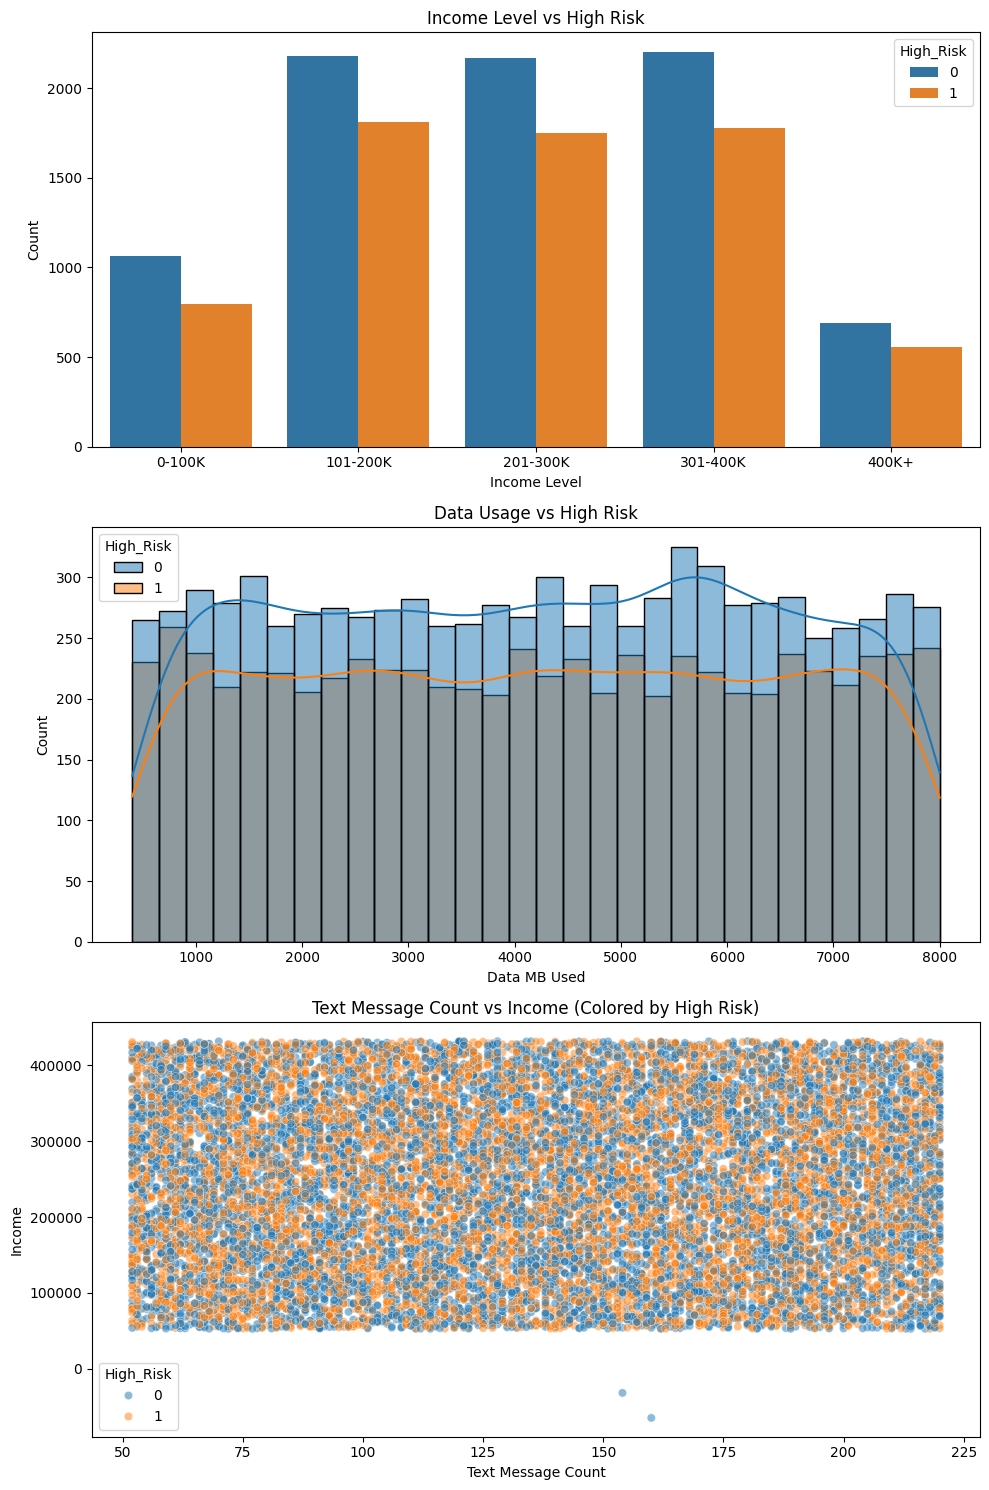

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/megatelco_leave_survey.csv"
df = pd.read_csv(file_path)

# 创建 Income_Level 变量
bins = [0, 100000, 200000, 300000, 400000, float('inf')]
labels = ["0-100K", "101-200K", "201-300K", "301-400K", "400K+"]
df["Income_Level"] = pd.cut(df["income"], bins=bins, labels=labels, right=True)

# 创建 High_Risk 变量
df["High_Risk"] = ((df["reported_satisfaction"] == "low") & (df["considering_change_of_plan"] == "yes")).astype(int)
df["High_Risk"] = df["High_Risk"].astype("category")

# 生成可视化
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Chart 1: Income_Level vs High_Risk (Bar Chart)
sns.countplot(data=df, x="Income_Level", hue="High_Risk", ax=axes[0])
axes[0].set_title("Income Level vs High Risk")
axes[0].set_xlabel("Income Level")
axes[0].set_ylabel("Count")

# Chart 2: Data Usage vs High_Risk (Histogram)
sns.histplot(data=df, x="data_mb_used", hue="High_Risk", kde=True, bins=30, ax=axes[1])
axes[1].set_title("Data Usage vs High Risk")
axes[1].set_xlabel("Data MB Used")
axes[1].set_ylabel("Count")

# Chart 3: Text Message Count vs Income (Scatter Plot)
sns.scatterplot(data=df, x="text_message_count", y="income", hue="High_Risk", alpha=0.5, ax=axes[2])
axes[2].set_title("Text Message Count vs Income (Colored by High Risk)")
axes[2].set_xlabel("Text Message Count")
axes[2].set_ylabel("Income")

plt.tight_layout()
plt.show()
